In [422]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [423]:
df = pd.read_csv('./data/loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [425]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [426]:
df.groupby('loan_status').agg({
    'person_income':['mean', 'max','min'],
    'credit_score':['mean', 'max','min'],
    'loan_percent_income':['mean', 'max','min'],
})

person_income                    credit_score            \
                     mean        max     min         mean  max  min   
loan_status                                                           
0            86157.040743  7200766.0  9595.0   632.814914  850  390   
1            59886.096900   845636.0  8000.0   631.887200  767  431   

            loan_percent_income             
                           mean   max  min  
loan_status                                 
0                      0.121783  0.66  0.0  
1                      0.202521  0.62  0.0

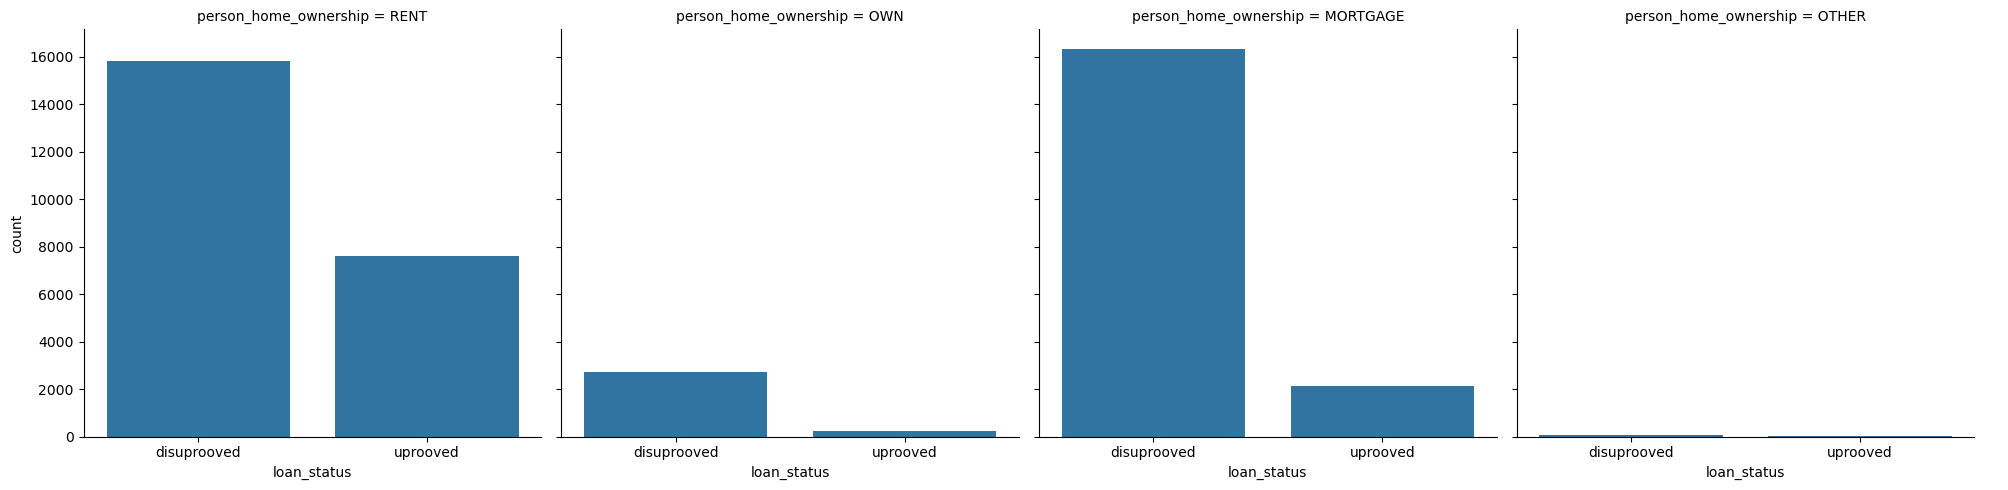

In [427]:
sns.catplot(data=df, kind='count', x='loan_status', col = 'person_home_ownership')
plt.xticks([0,1], labels=['disuprooved', 'uprooved'])
plt.show()

In [428]:
df.loan_status.value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

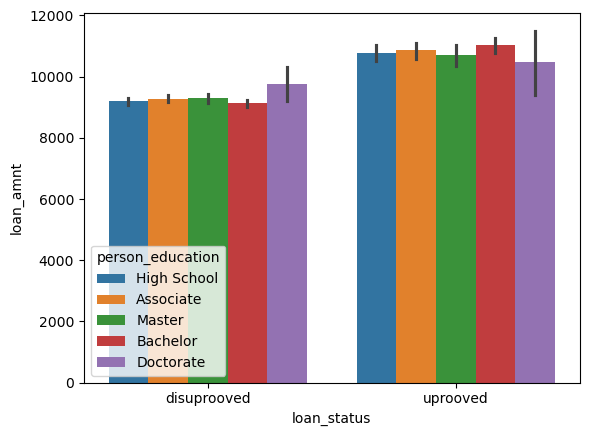

In [429]:
sns.barplot(data=df, x='loan_status', y='loan_amnt', hue='person_education')
plt.xticks([0,1], labels=['disuprooved', 'uprooved']);

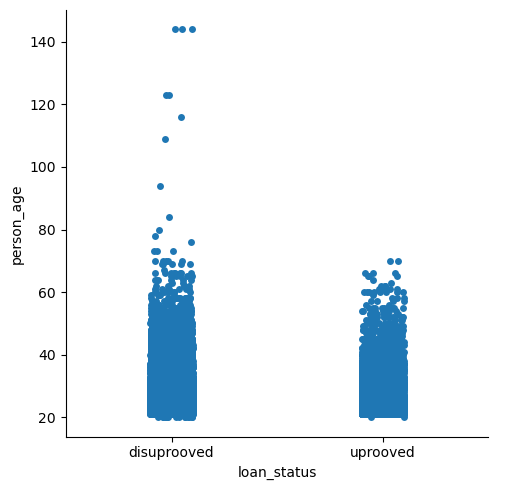

In [430]:
sns.catplot(data=df, x='loan_status', y='person_age')
plt.xticks([0,1], labels=['disuprooved', 'uprooved']);

In [431]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [432]:
df.isna().any(axis=1).sum()

np.int64(0)

In [433]:
df = df.dropna()

In [434]:
df.drop(df[df["person_age"] > 90].index, inplace=True)

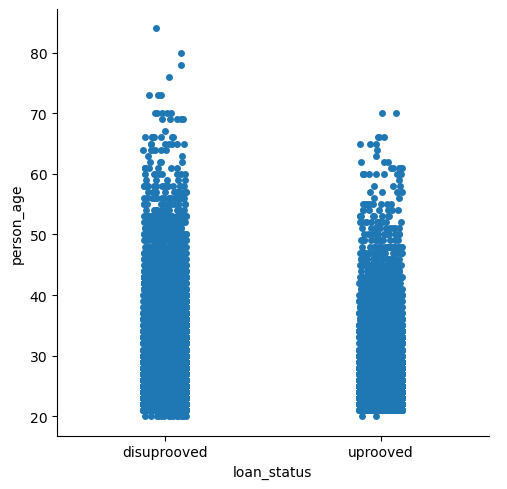

In [435]:
sns.catplot(data=df, x='loan_status', y='person_age')
plt.xticks([0,1], labels=['disuprooved', 'uprooved']);

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44992 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44992 non-null  float64
 1   person_gender                   44992 non-null  object 
 2   person_education                44992 non-null  object 
 3   person_income                   44992 non-null  float64
 4   person_emp_exp                  44992 non-null  int64  
 5   person_home_ownership           44992 non-null  object 
 6   loan_amnt                       44992 non-null  float64
 7   loan_intent                     44992 non-null  object 
 8   loan_int_rate                   44992 non-null  float64
 9   loan_percent_income             44992 non-null  float64
 10  cb_person_cred_hist_length      44992 non-null  float64
 11  credit_score                    44992 non-null  int64  
 12  previous_loan_defaults_on_file  44992

In [437]:

df['previous_loan_defaults_on_file'] = (
    df['previous_loan_defaults_on_file']
    .astype(str)
    .map({'Yes': 1, 'No': 0})
)
df['previous_loan_defaults_on_file']

0        0
1        1
2        0
3        0
4        0
        ..
44995    0
44996    0
44997    0
44998    0
44999    0
Name: previous_loan_defaults_on_file, Length: 44992, dtype: int64

In [438]:
df.isna().any(axis=1).sum()

np.int64(0)

In [439]:
df= df.drop(columns=['person_gender'])

df = df.reset_index(drop=True)

In [440]:
encoder = OneHotEncoder()
transformed_data_arr = encoder.fit_transform(df[['person_education','person_home_ownership','loan_intent' ]])
transformed_data_df = pd.DataFrame(transformed_data_arr.toarray(), columns=encoder.get_feature_names_out())
transformed_data_df[transformed_data_df.isna().any(axis=1)]
transformed_data_df


,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44987,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
44988,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
44989,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
44990,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [441]:
transformed_data_df.isna().any(axis=1).sum()

np.int64(0)

In [442]:
transformed_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44992 entries, 0 to 44991
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_education_Associate      44992 non-null  float64
 1   person_education_Bachelor       44992 non-null  float64
 2   person_education_Doctorate      44992 non-null  float64
 3   person_education_High School    44992 non-null  float64
 4   person_education_Master         44992 non-null  float64
 5   person_home_ownership_MORTGAGE  44992 non-null  float64
 6   person_home_ownership_OTHER     44992 non-null  float64
 7   person_home_ownership_OWN       44992 non-null  float64
 8   person_home_ownership_RENT      44992 non-null  float64
 9   loan_intent_DEBTCONSOLIDATION   44992 non-null  float64
 10  loan_intent_EDUCATION           44992 non-null  float64
 11  loan_intent_HOMEIMPROVEMENT     44992 non-null  float64
 12  loan_intent_MEDICAL             

In [443]:
df = df.drop(columns=['person_education','person_home_ownership', 'loan_intent'])

In [444]:
df.isna().any(axis=1).sum()

np.int64(0)

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44992 entries, 0 to 44991
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44992 non-null  float64
 1   person_income                   44992 non-null  float64
 2   person_emp_exp                  44992 non-null  int64  
 3   loan_amnt                       44992 non-null  float64
 4   loan_int_rate                   44992 non-null  float64
 5   loan_percent_income             44992 non-null  float64
 6   cb_person_cred_hist_length      44992 non-null  float64
 7   credit_score                    44992 non-null  int64  
 8   previous_loan_defaults_on_file  44992 non-null  int64  
 9   loan_status                     44992 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 3.4 MB


In [446]:
df_final= pd.concat([df, transformed_data_df], axis=1)
df_final.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [447]:
df_final.isna().any(axis=1).sum()

np.int64(0)

In [448]:
mosr_corelated_values = np.abs((df.corr()['loan_status'])).sort_values(ascending=False).iloc[:10] 
mosr_corelated_values

loan_status                       1.000000
previous_loan_defaults_on_file    0.543208
loan_percent_income               0.384889
loan_int_rate                     0.332048
person_income                     0.169045
loan_amnt                         0.107720
person_age                        0.020441
person_emp_exp                    0.019418
cb_person_cred_hist_length        0.014674
credit_score                      0.007376
Name: loan_status, dtype: float64

In [449]:
mosr_corelated_values = mosr_corelated_values.index.to_list()
df = df[mosr_corelated_values]


In [450]:
df.isna().any(axis=1).sum()

np.int64(0)

<Axes: >

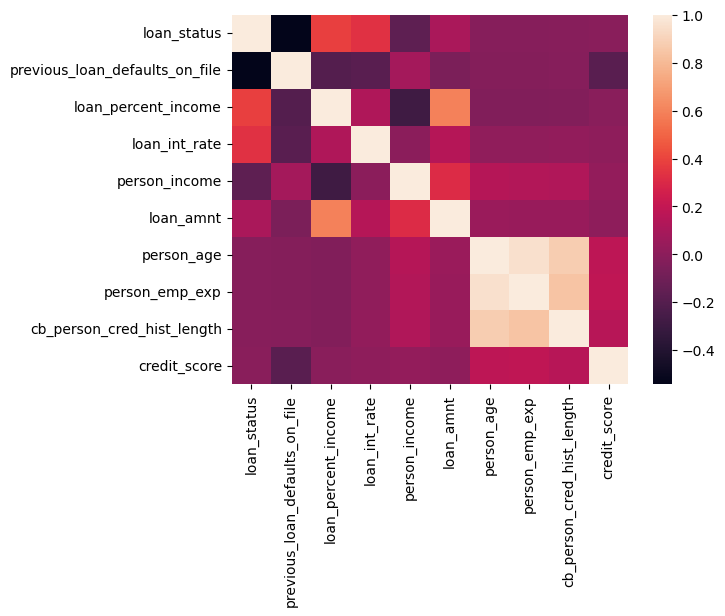

In [451]:
sns.heatmap(df.corr())

In [452]:
df = df.dropna()

In [453]:
df.to_csv("cleaned_data.csv", index=False)